In [1]:
#!conda install -c conda-forge importnb -y
#!pip install -q tensorflow-recommenders
#!pip install ipynb

In [6]:
import numpy as np
import pandas as pd
from pprint import pprint
import json
from typing import Dict, Optional, Text, Tuple, Union
from PIL import Image
from collections import defaultdict
import re

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
from itertools import chain
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from importlib import reload
import utils
reload(utils)
from utils import *

In [3]:
#from ipynb.fs.full.exploration__topk_with_exclusions import tsne_to_grid_plotter_manual
#from importnb import Notebook
#Notebook.load('exploration__topk_with_exclusions.ipynb')

0    23449.png
1    23279.png
2    23905.png
3    23821.png
4    23931.png
Name: record_id, dtype: object
0    23449
1    23279
2    23905
3    23821
4    23931
Name: record_id, dtype: object
Int64Index([10976], dtype='int64', name='model_id')


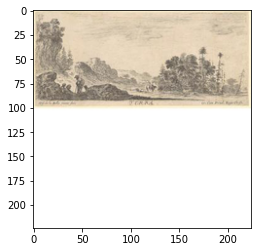

In [29]:
feature_path = "../data/processed/ethz/features/features_resnet50_trained.csv"
metadata_path = "../data/raw/ethz/imageSearch_metadata_03.12.csv"
df_feat, df = process_metadata(feature_path, metadata_path)
#print(df.head())
#print(df['model_id'])
print(df.loc[df['record_id']==135484].index)#'model_id'
model_id_idx = df.loc[df['record_id']==135484].index  

# check that the file paths are correct
model_id_lst = model_id_idx.tolist()#17186
for model_id in model_id_lst:
    img_fpth = df["fpath"][model_id]
    #Image.open(img_fpth)
    img = plt.imread(img_fpth)
    plt.imshow(img)
    plt.show()


In [30]:
df_feat


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,../data/processed/ethz/images/images/23/23449.png,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,...,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851,-0.215851
1,../data/processed/ethz/images/images/23/23279.png,-0.256523,-0.256523,-0.171137,-0.256523,-0.256523,-0.256523,-0.256523,-0.256523,-0.256523,...,-0.256523,5.407426,-0.256523,-0.256523,-0.256523,-0.256523,-0.256523,-0.256523,0.995019,-0.256523
2,../data/processed/ethz/images/images/23/23905.png,-0.346639,-0.346639,-0.346639,3.606390,-0.346639,0.599607,-0.346639,-0.346639,-0.170354,...,-0.346639,1.439696,1.039839,-0.346639,-0.346639,2.391663,-0.346639,-0.346639,-0.346639,1.044170
3,../data/processed/ethz/images/images/23/23821.png,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,...,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648,-0.174648
4,../data/processed/ethz/images/images/23/23931.png,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,...,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235,-0.215235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20830,../data/processed/ethz/images/images/3/3820.png,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,...,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,-0.132904,2.082476,-0.132904,-0.132904,-0.132904
20831,../data/processed/ethz/images/images/3/3092.png,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,...,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,-0.147439,0.496438,-0.147439,-0.147439,-0.147439
20832,../data/processed/ethz/images/images/3/3232.png,-0.133667,-0.133667,-0.133667,1.511373,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,...,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667,-0.133667
20833,../data/processed/ethz/images/images/3/3847.png,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,...,-0.233521,-0.233521,-0.233521,-0.233521,-0.233521,0.762768,-0.233521,-0.233521,-0.233521,1.172334


In [29]:
df

,fpath,record_id,db_id,imageURL,invNr,person,date,title,classification,material_technique,institutionIsil,recordURL,imageLicence,timestamp
model_id,,,,,,,,,,,,,,
0,../data/processed/ethz/img_224*224/images/0/10...,107,5144.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 001367.23,"Raimondi, Marcantonio (1470 / 1482 um - um 152...",Enstehung des Druckträgers: 1510 - 1515,Veronika zwischen den Heiligen Petrus und Paul...,Druckgraphik,Kupferstich,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-10-07T14:58:23.207Z
1,../data/processed/ethz/img_224*224/images/0/11...,114,21251.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,Z 000324,"Ritz, Raphael (1829 - 1894), Künstler",Entstehung: 1850 - 1900 [zweite Hälfte des 19....,Prière en famille,Handzeichnung,Bleistift,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2021-02-22T15:05:47.441Z
2,../data/processed/ethz/img_224*224/images/0/11...,115,4995.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 013322,"Seifert, Friedrich (1838 - 1920); Pasqualoni, ...",Enstehung des Druckträgers: 1874,Messe von Bolsena,Druckgraphik,"Kupferstich, Chine collé",Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T17:50:47.553Z
3,../data/processed/ethz/img_224*224/images/0/12...,127,21256.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,Z 000329,"Ritz, Raphael (1829 - 1894), Künstler",Entstehung: Um 1850 - 19894,Chalets,Handzeichnung,"gehöht, Kreide",Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T17:50:54.27Z
4,../data/processed/ethz/img_224*224/images/0/12...,128,4813.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 013075,"Jegher, Christoffel (1596 vor - um 1653), Ausf...",Enstehung des Druckträgers: 1633 - 1636,Ruhe auf der Flucht nach Ägypten,Druckgraphik,"Holzschnitt, Chiaroscuroschnitt",Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-10-20T08:04:26.363Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20830,../data/processed/ethz/img_224*224/images/21/2...,21104,15457.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 005468,"Dyck, Anton van (1599 - 1641), Vorlage; Clouwe...",Enstehung des Druckträgers: 1640 - 1650,Porträt von Theodoor Rogiers [Rasier; de Rasiè...,Druckgraphik,Kupferstich,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-06-25T21:22:34.603Z
20831,../data/processed/ethz/img_224*224/images/21/2...,21107,18318.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 007624,"Meckenem, Israhel van (1440 / 1445 um - 1503),...",Enstehung des Druckträgers: Um 1500 - 1503,Tod der Lucretia,Druckgraphik,Kupferstich,Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-09-16T12:38:45.637Z
20832,../data/processed/ethz/img_224*224/images/21/2...,21108,14999.0,https://e-gs.ethz.ch/eMP/eMuseumPlus?service=I...,D 005052,"Rembrandt Harmensz. van Rijn (1606 - 1669), Kü...",Enstehung des Druckträgers: Um 1644,"Ruhe auf der Flucht nach Ägypten, Nachtstück",Druckgraphik,"Kaltnadel, Radierung",Graphische Sammlung ETH Zürich (CH-000511-9),https://e-gs.ethz.ch/eMP/eMuseumPlus?service=E...,Public Domain Mark 1.0,2020-10-16T13:38:11.137Z


In [31]:
# init the topk layer
topk = tfrs.layers.factorized_top_k.BruteForce(k=100)
# create the index for the topk NN model
# get the features array
img_features = df_feat.iloc[:,1:].values
#create the index
topk = topk.index(img_features)

k=10
results_list = []
for model_id in model_id_lst:
    query_1 = tf.constant(img_features[model_id,:].reshape(1,-1), dtype=np.float64)
    scores, result_ids = topk.call(query_1, k=k)
    result_ids_arr = np.sort(result_ids[0])
    #get metadata for from tensor of result ids
    results = df.loc[result_ids.numpy()[0].tolist(), :]
    results_list.append(results)


2021-09-01 09:57:47.834642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-01 09:57:47.892614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-01 09:57:47.893868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-01 09:57:47.901035: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
df.iloc[model_id,0]

'../data/processed/ethz/img_224*224/images/135/135484.png'

for index in range(results.shape[0]):
    path = results.iloc[index,0]
    print(path)
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

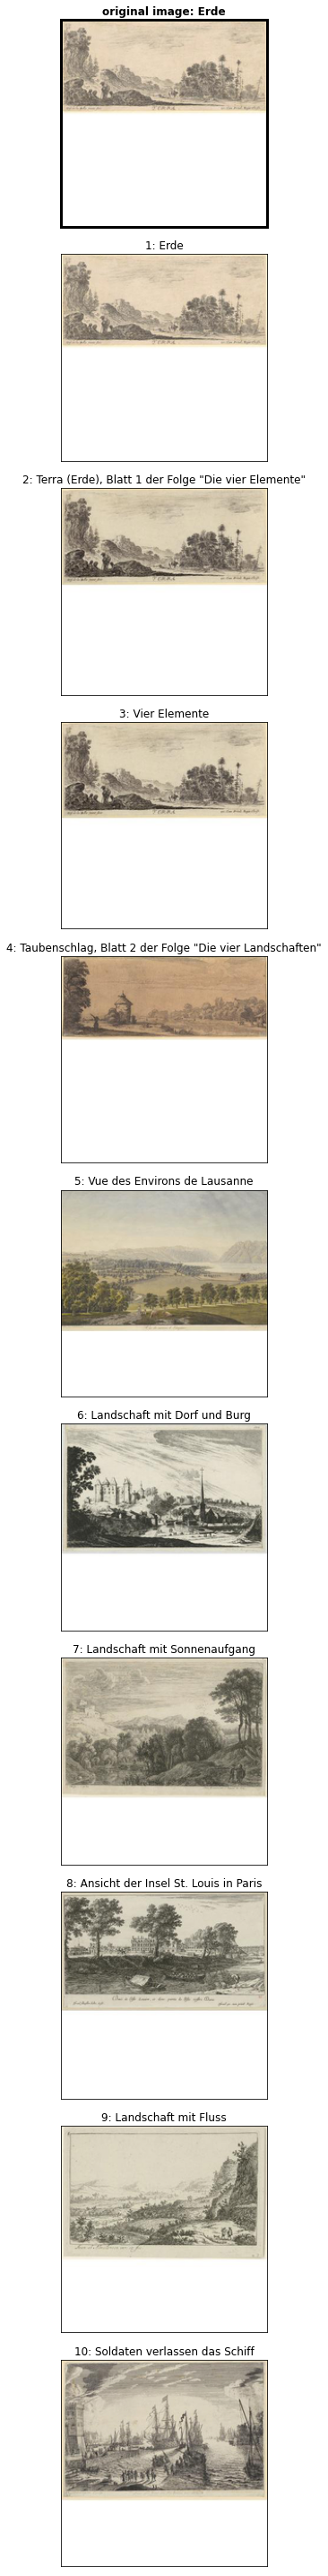

1 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=135484&viewType=detailView
2 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=26119&viewType=detailView
3 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=28840&viewType=detailView
4 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=29718&viewType=detailView
5 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=34420&viewType=detailView
6 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=225926&viewType=detailView
7 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=227694&viewType=detailView
8 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=242555&viewType=detailView
9 :  https://e-gs.ethz.ch/eM

In [32]:
plot_similar_images(model_id, df, results)

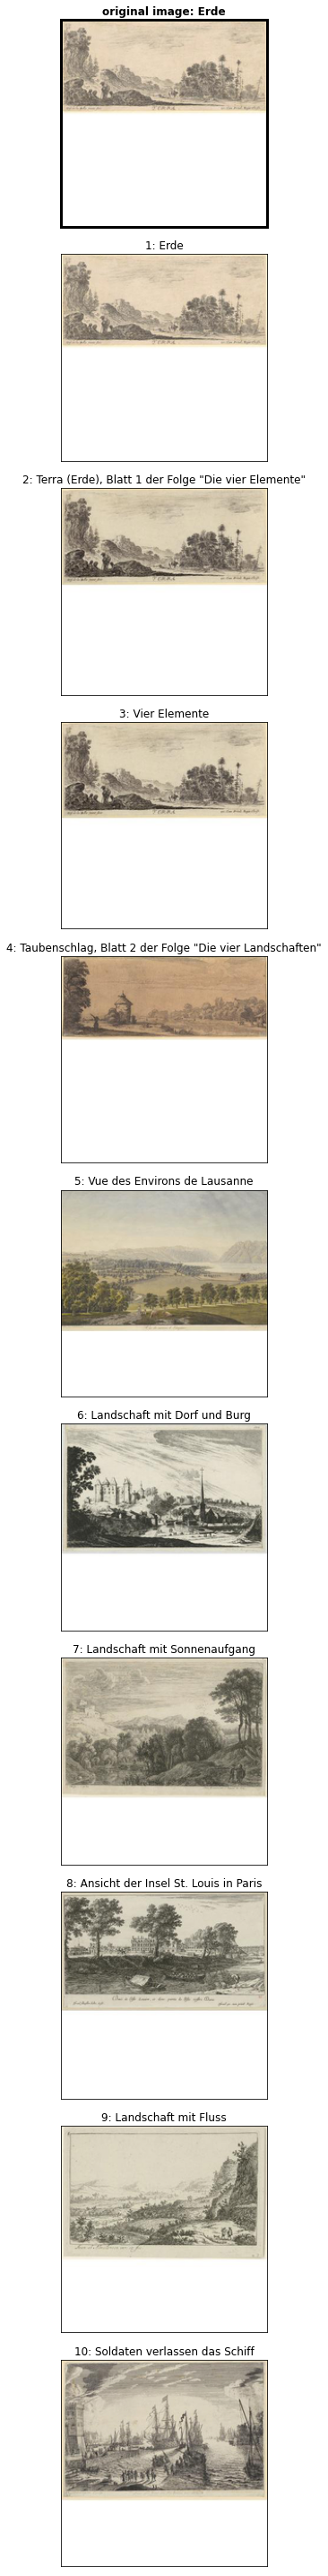

1 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=135484&viewType=detailView
2 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=26119&viewType=detailView
3 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=28840&viewType=detailView
4 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=29718&viewType=detailView
5 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=34420&viewType=detailView
6 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=225926&viewType=detailView
7 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=227694&viewType=detailView
8 :  https://e-gs.ethz.ch/eMP/eMuseumPlus?service=ExternalInterface&module=collection&objectId=242555&viewType=detailView
9 :  https://e-gs.ethz.ch/eM

In [32]:
plot_similar_images(model_id, df, results)